# 앤스콤 데이터 집합 불러오기

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

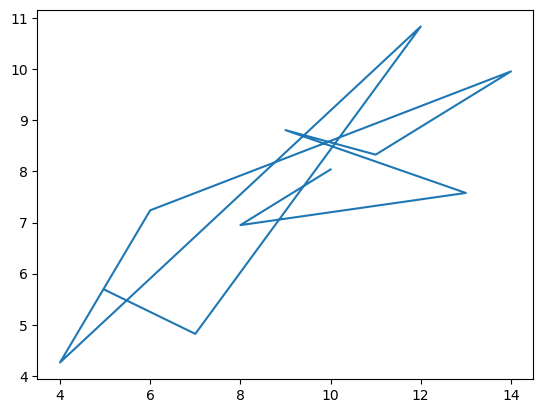

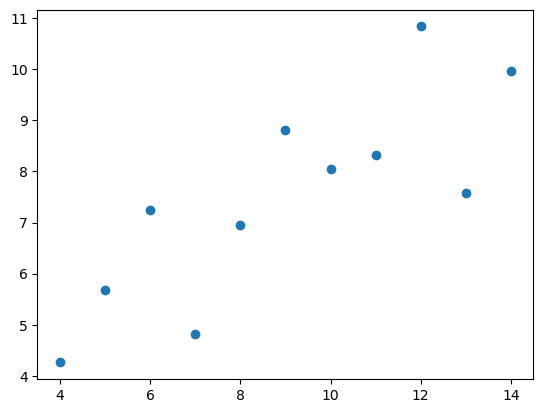

In [6]:
import seaborn as sns 
ans = sns.load_dataset("anscombe") 
print(ans)
print(type(ans))

%matplotlib inline
import matplotlib.pyplot as plt

dataset_1 = ans[ans['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])
plt.show()

plt.plot(dataset_1['x'], dataset_1['y'], 'o')
plt.show()

# matplotlib 라이브러리로 간단한 그래프 그리기

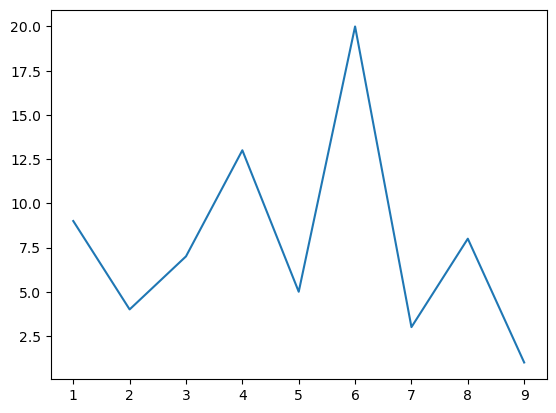

In [7]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9,]
y = [9,4,7,13,5,20,3,8,1]

plt.plot(x,y)
plt.show()

# 한 번에 4개의 그래프 그리기

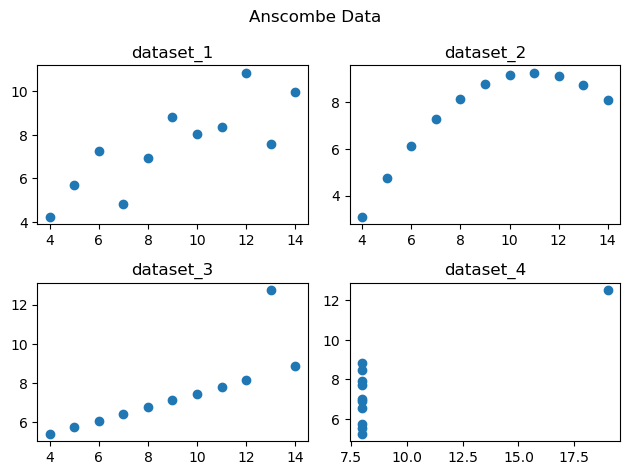

In [8]:
dataset_2 = ans[ans['dataset'] == 'II'] 
dataset_3 = ans[ans['dataset'] == 'III'] 
dataset_4 = ans[ans['dataset'] == 'IV']

fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)
fig

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig

fig.suptitle("Anscombe Data")
fig

fig.tight_layout()
fig

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


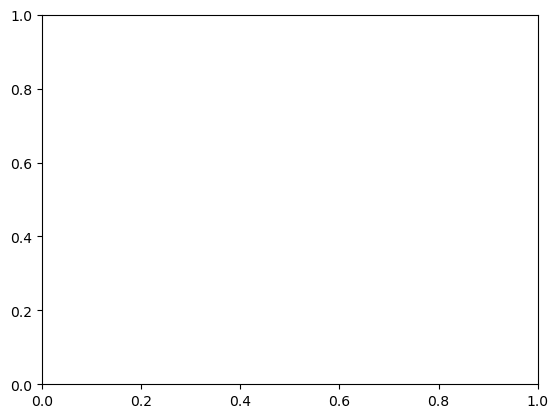

In [10]:
tips = sns.load_dataset("tips") 
print(tips.head())
print(type(tips))

fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1)
fig

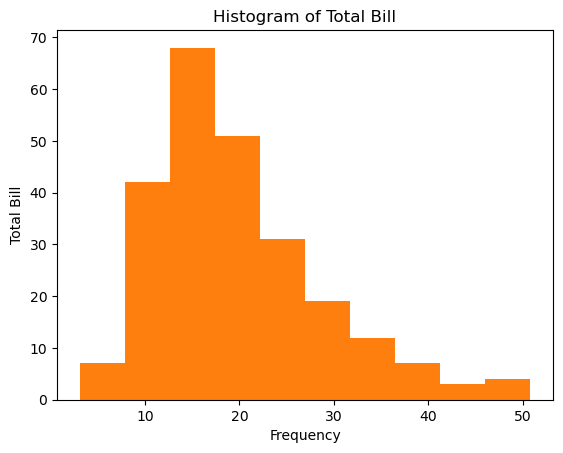

In [12]:
axes1.hist(tips['total_bill'], bins=10)   #히스토그램
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency') 
axes1.set_ylabel('Total Bill')
fig

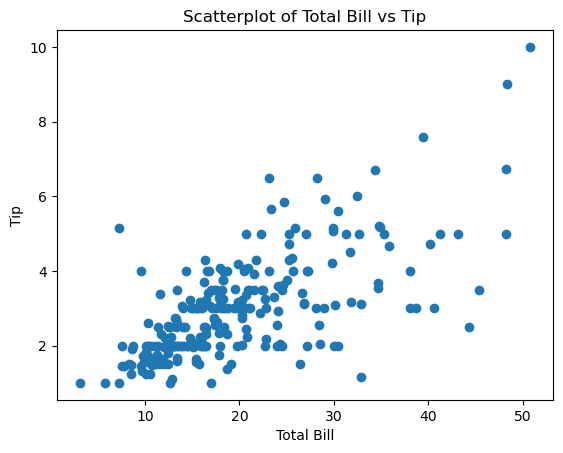

In [15]:
scatter_plot = plt.figure()  #산점도
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')
scatter_plot

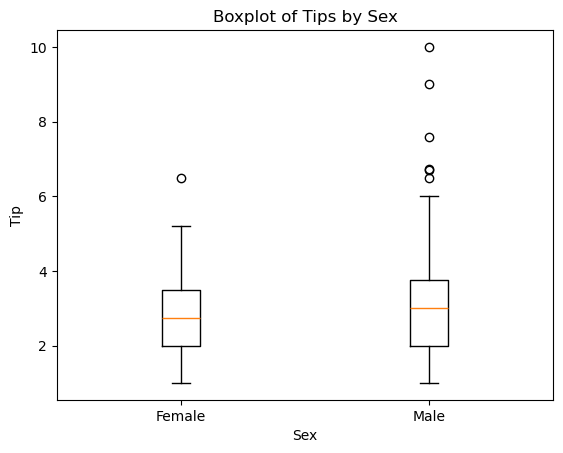

In [16]:
boxplot = plt.figure()  #박스 그래프
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], 
               tips[tips['sex'] == 'Male']['tip']], 
               tick_labels=['Female', 'Male'])

axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')
boxplot

# 단변량 그래프 그리기 - 히스토그램

C:\Users\chud2\AppData\Local\Temp\ipykernel_5832\2924001407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


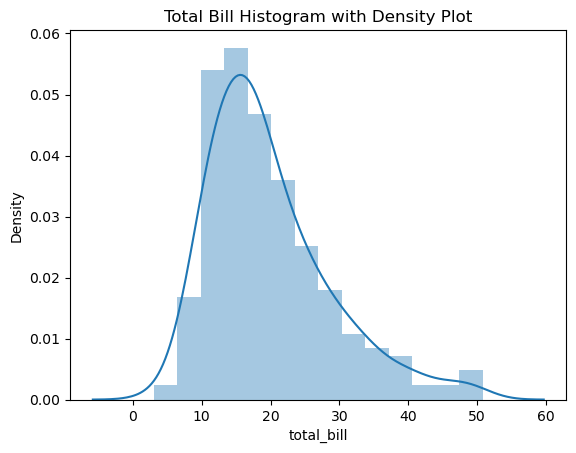

In [32]:
import seaborn as sns
tips = sns.load_dataset("tips")

ax = plt.subplots()
ax = sns.distplot(tips['total_bill']) 
ax.set_title('Total Bill Histogram with Density Plot')
plt.show()

C:\Users\chud2\AppData\Local\Temp\ipykernel_5832\2965493558.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde=False)


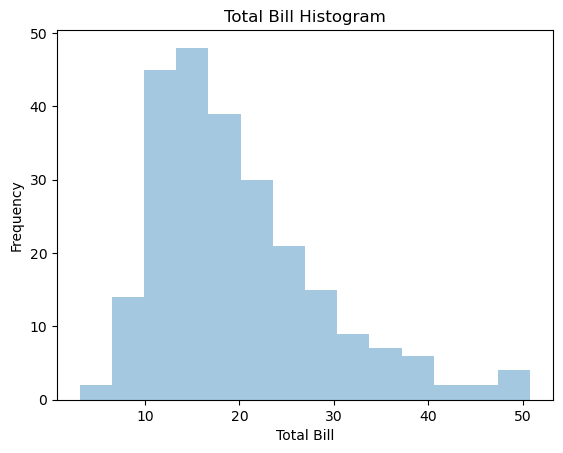

In [34]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False) 
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')
plt.show()

C:\Users\chud2\AppData\Local\Temp\ipykernel_5832\1165979623.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], hist=False)


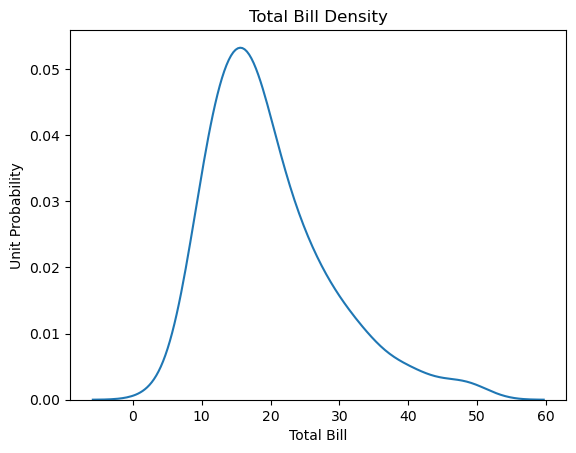

In [35]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False) 
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')
plt.show()

C:\Users\chud2\AppData\Local\Temp\ipykernel_5832\3709431325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], rug=True)


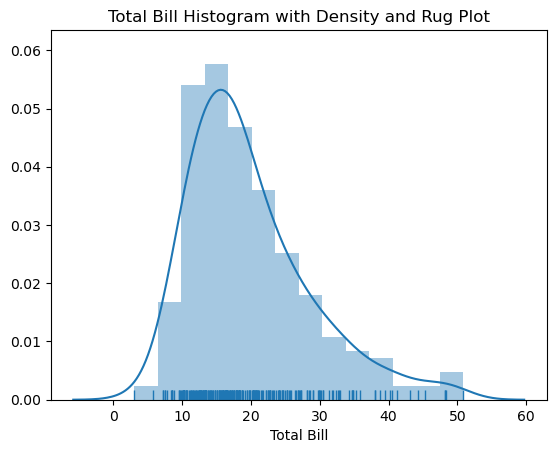

In [38]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True) 
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('')
plt.show()

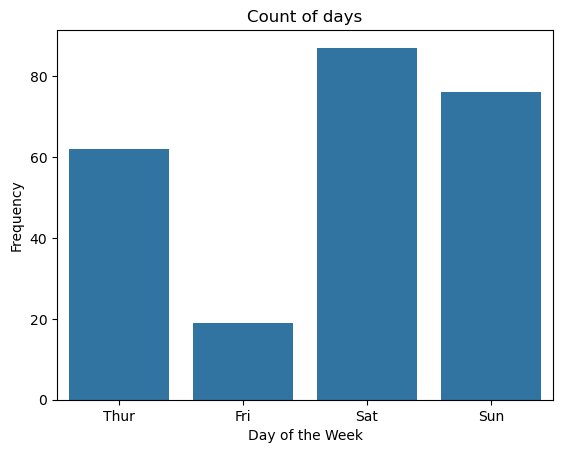

In [42]:
ax = plt.subplots()
ax = sns.countplot(x='day', data=tips) 
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

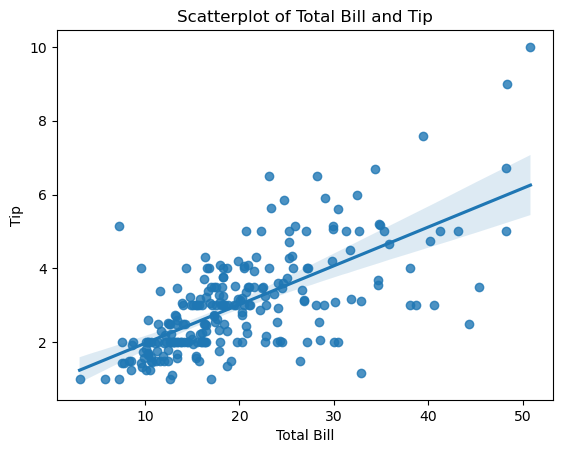

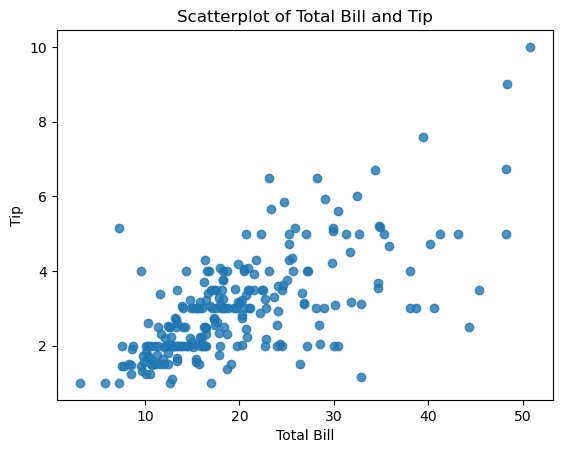

In [56]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()


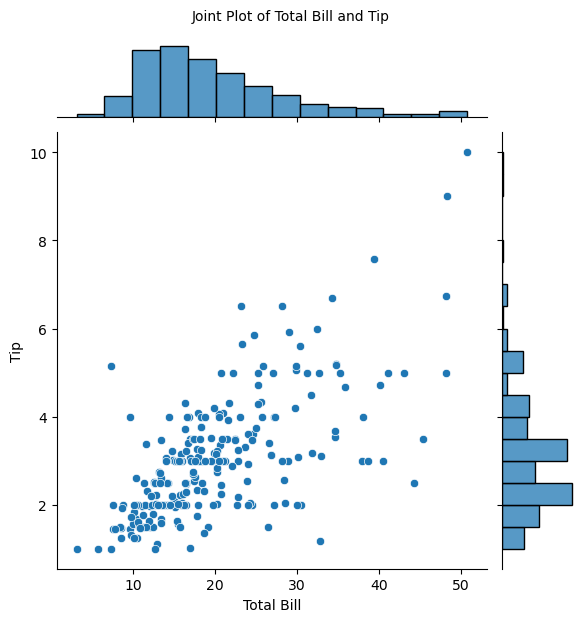

In [53]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
plt.show()

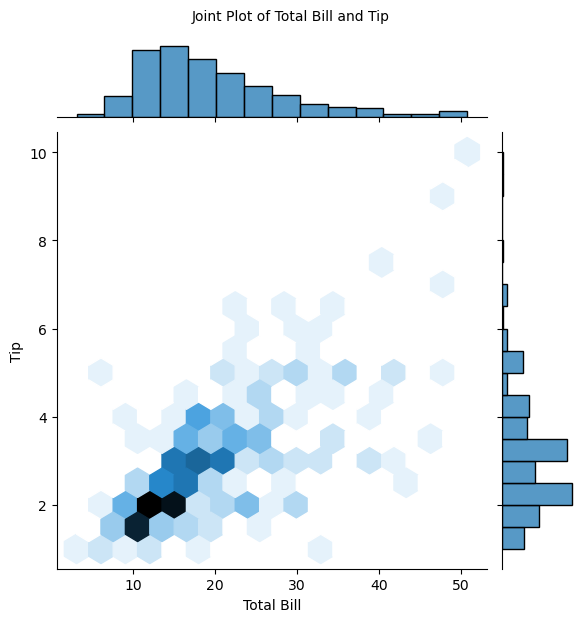

In [55]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex") 
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
plt.show()

C:\Users\chud2\AppData\Local\Temp\ipykernel_5832\1658060986.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],


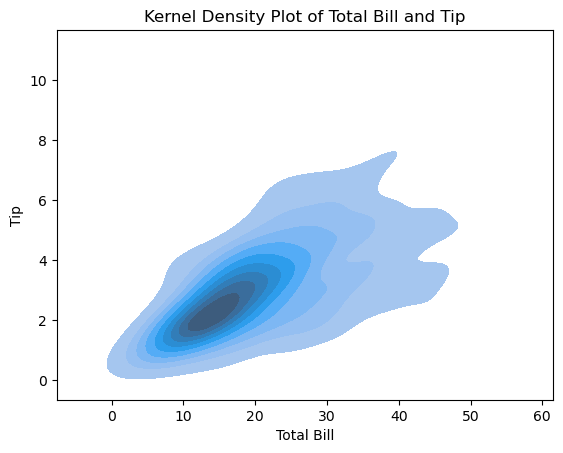

In [61]:
ax = plt.subplots() 
ax = sns.kdeplot(x=tips['total_bill'],
                 y=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')
plt.show()

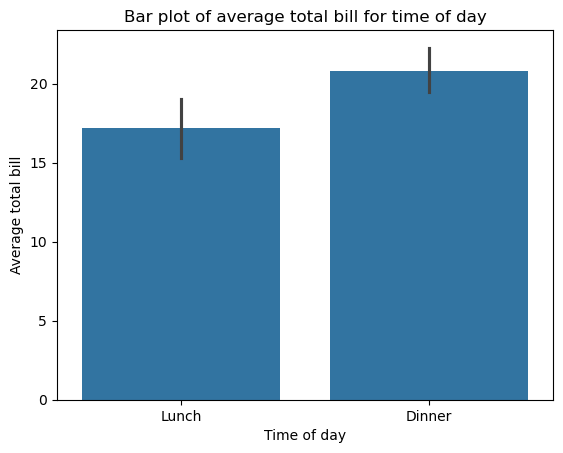

In [64]:
ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')
plt.show()

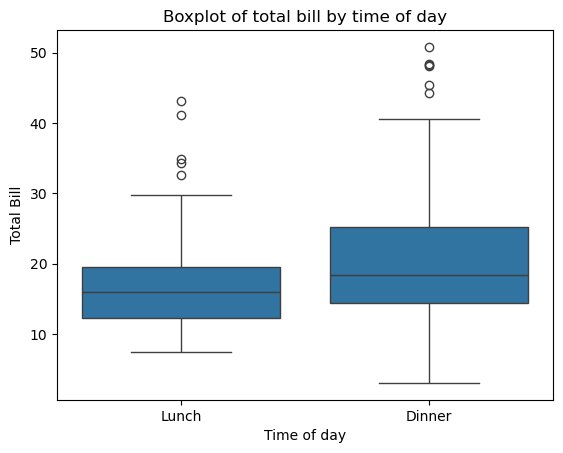

In [65]:
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')
plt.show()

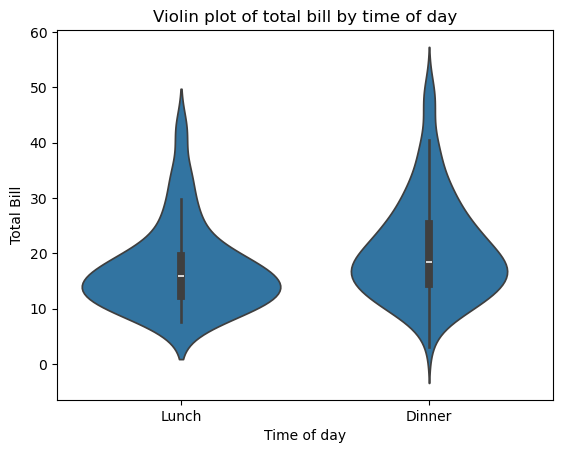

In [66]:
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')
plt.show()

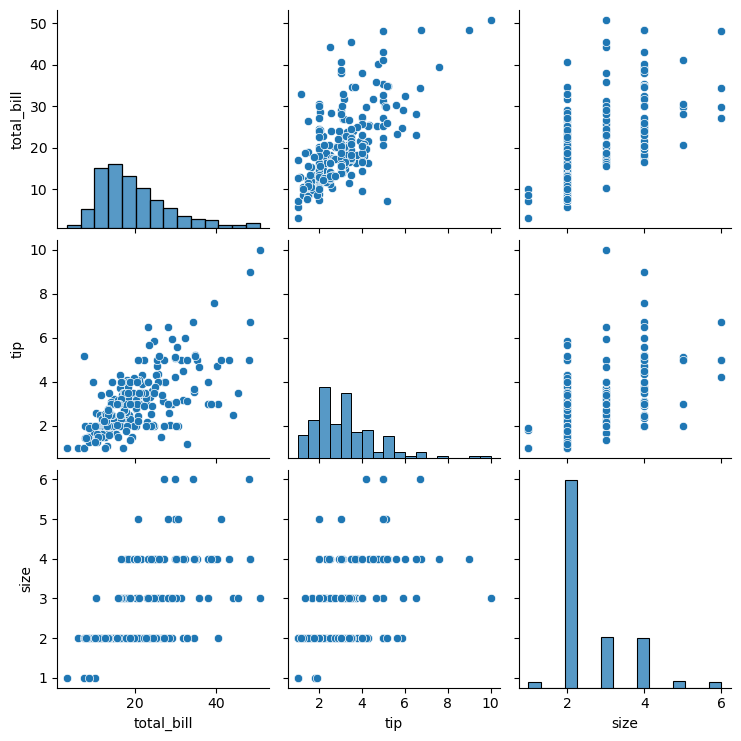

In [70]:
fig = sns.pairplot(tips)
plt.show()

C:\Users\chud2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\chud2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, colo

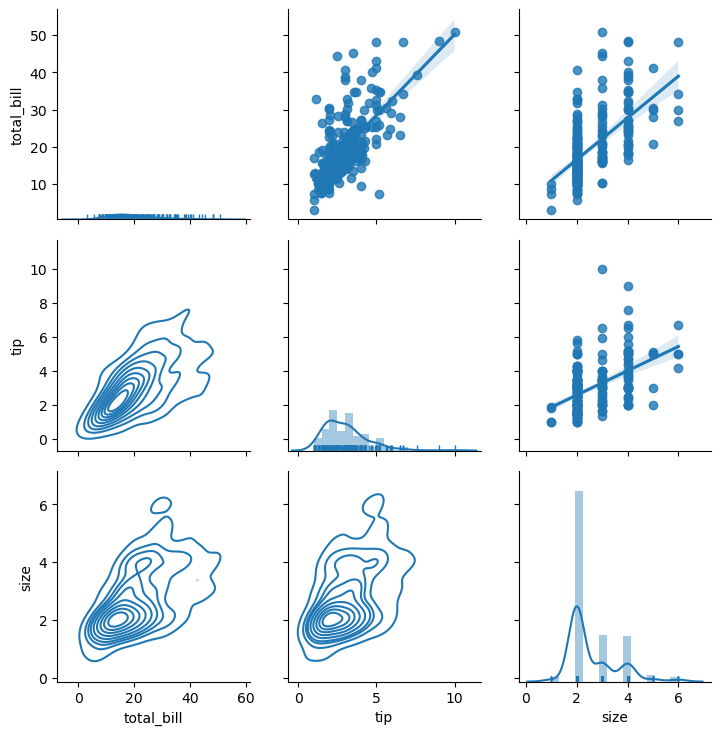

In [71]:
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 
plt.show()

# 다변량 그래프 그리기

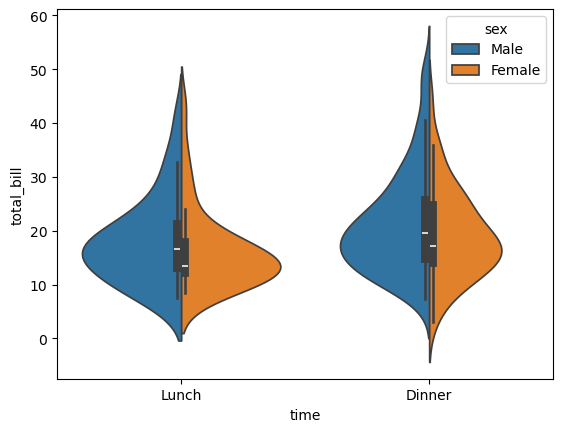

In [73]:
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

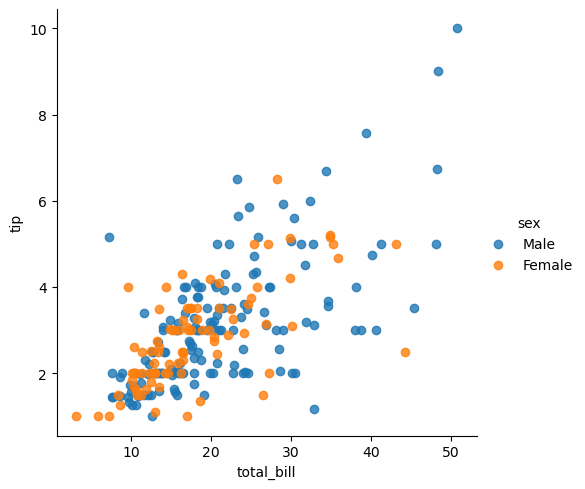

In [74]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

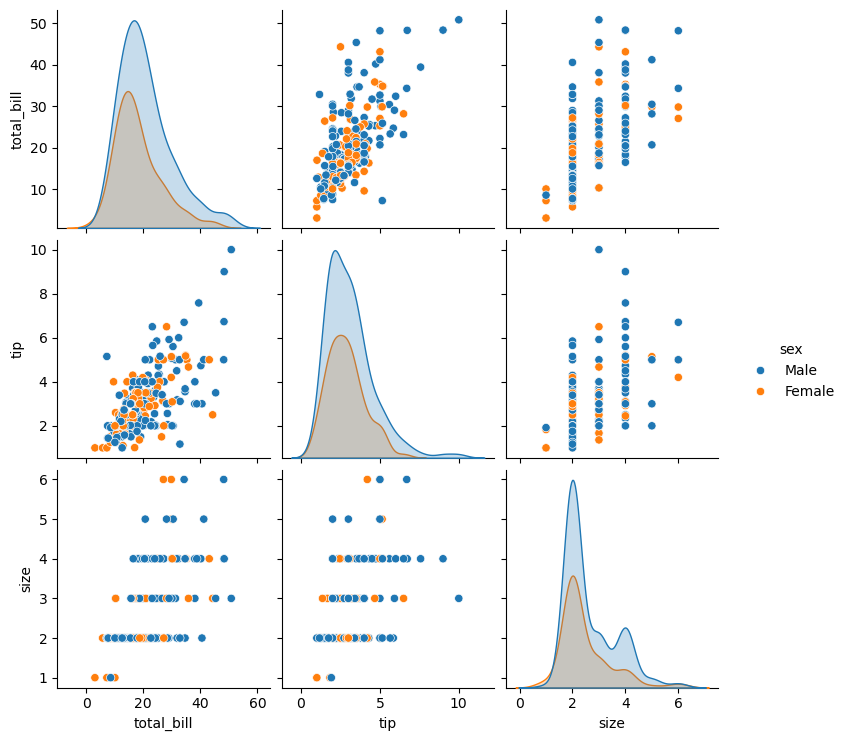

In [77]:
fig = sns.pairplot(tips, hue='sex')
plt.show()

In [84]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': tips['size']*10}) 
plt.show()

scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o', 'x'], scatter_kws={'s': tips['size']*10}) 
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

# 데이터프레임과 시리즈로 그래프 그리기

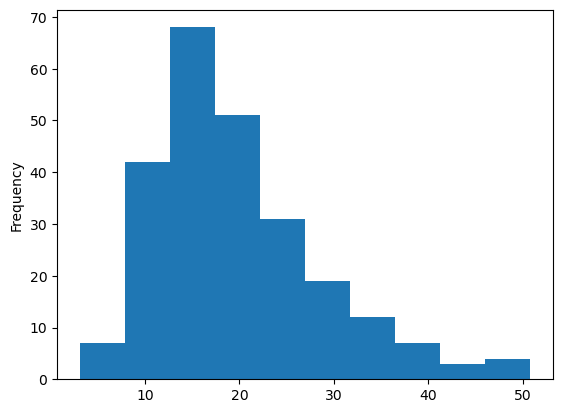

In [88]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist() 
plt.show()

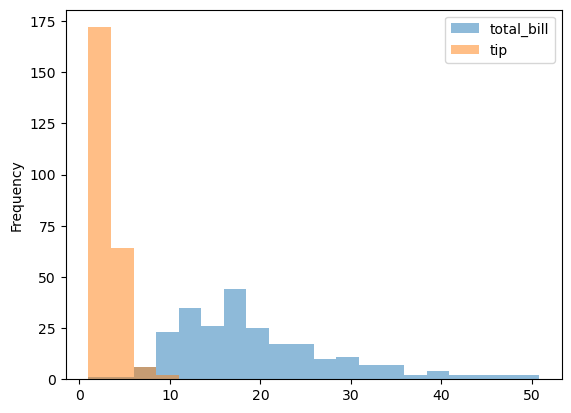

In [102]:
fig, ax = plt.subplots() 
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)  
plt.show()

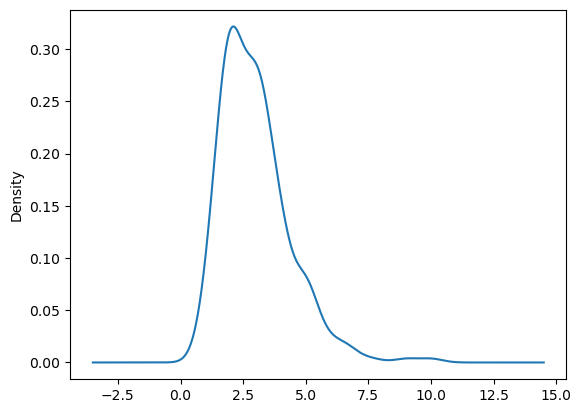

In [103]:
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde()
plt.show()

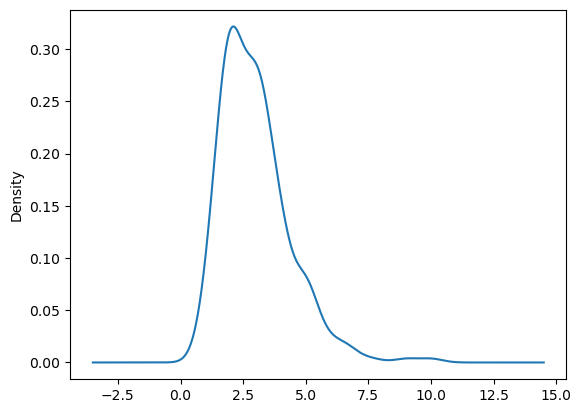

In [103]:
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde()
plt.show()

In [ ]:
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax) 
plt.show()

In [ ]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax) 
plt.show()

In [ ]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax) 
plt.show()

In [ ]:
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax) 
plt.show()

# 알아두면 좋아요